# 線形モデルを題材として学習について学ぶ

In [12]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [3]:
SEED = 0xcafe
random.seed(SEED)
np.random.seed(SEED)

In [35]:
def plot_option(ax, xlim, ylim, equal_aspect=True, grid=True):
    ax.set_xlim(*xlim)
    ax.set_ylim(*ylim)
    if equal_aspect:
        ax.set_aspect('equal')
    if grid:
        ax.grid()

[1. 2. 3.] [0.98897097 1.88925183 2.80069625]


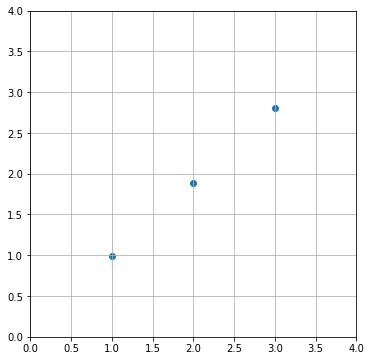

In [36]:
X = np.arange(1, 4).astype(float)
Y = np.random.normal(X, 0.2)
print(X, Y)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X, Y)
plot_option(ax, (0, 4), (0, 4))
plt.show()

線形モデル $y = f(x; {\bf{w}})$
$$
f(x;{\bf{w}}) = w_0 + w_1 x
$$
として重み ${\bf{w}} = [w_0, w_1]^\top$ を求める．

$x_0 = 1, x_1 = x$ として縦ベクトル ${\bf{x}} = [x_0, x_1]^\top$ を考えると
$$
\begin{align}
f({\bf{x}}; {\bf{w}})
&= x_0 w_0 + x_1 w_1 \\
&= [x_0, x_1]
\left[\begin{array}{c}
w_0 \\
w_1
\end{array}\right] \\
&= {\bf{x}}^\top {\bf{w}}
\end{align}
$$
と表現できる．

In [74]:
def linear_model(w):
    """重みが `w` の線形モデルの作成"""
    return lambda x: w[0] + w[1] * x

# 単回帰分析

$$
\begin{align}
w_1 &= \frac{Cov[X, Y]}{Var[X]} \\
w_0 &= \mu_y - w_1 \mu_x
\end{align}
$$

NOTE: 何かおかしい気がする．

In [78]:
np.cov(X, Y), np.var(X), np.var(Y)

(array([[1.        , 0.90586264],
        [0.90586264, 0.82059751]]),
 0.6666666666666666,
 0.547065003343877)

In [79]:
W = np.zeros(2)
W[1] = np.cov(X, Y)[0, 1] / np.var(X)
W[0] = np.mean(Y) - W[1] * np.mean(X)
W

array([-0.8246149 ,  1.35879396])

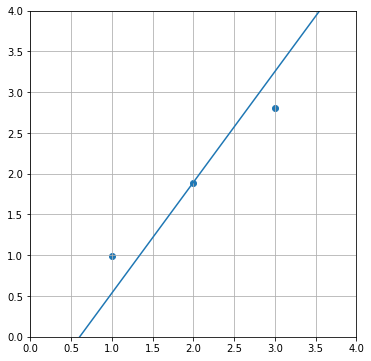

In [80]:
x = np.arange(5)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X, Y)
ax.plot(x, linear_model(W)(x))
plot_option(ax, (0, 4), (0, 4))
plt.show()

# 線形代数的に求める

損失関数は二乗誤差 $l(y, \hat{y}) = (y - \hat{y})^2$ を用いる．
損失関数 $L({\bf{w}})$ は
$$
\begin{align}
L({\bf{w}}) &= \sum_{i=1}^N l(y_i, f({\bf{x}}_i; {\bf{w}})) \\
&= \sum_{i=1}^N (y_i - f({\bf{x}}_i; {\bf{w}}))^2
\end{align}
$$
上を ${\bf{w}}$ で偏微分し，0 となるときの ${\bf{w}}$ を求める．
$$
{\bf{w}} = (X^\top X)^{-1} X^\top Y
$$

In [83]:
x, y = X.reshape(-1, 1), Y.reshape(-1, 1)
x = np.concatenate([np.ones_like(x), x], axis=1)
W = np.linalg.inv(x.T @ x) @ x.T @ y
W

array([[0.08124774],
       [0.90586264]])

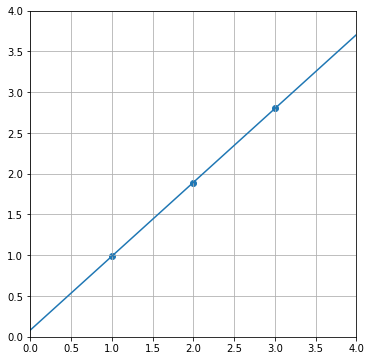

In [84]:
x = np.arange(5)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.scatter(X, Y)
ax.plot(x, linear_model(W)(x))
plot_option(ax, (0, 4), (0, 4))
plt.show()